## Breast Cancer Prediction
Breast cancer is one of the most common types of cancer in the UK. According to NHS, about 1 in 8 women are diagnosed with breast cancer during their lifetime, and early detection will significantly increase the chance of recovery.
​
Your client is a medical research company, and you are asked to improve the early detection of breast cancer using machine learning. The goal of the project is to train a machine learning model which predicts whether the cancer is benign or malignant.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


### Data exploration and visualisation
- Import the data and familiarise yourself with it. You might want to understand things like:
   - What is the data size?
   - How many attributes are there?
   - What's the type of each attribute (integer, boolean, string etc)?
   - Check missing values, null?
   - Any outliers or anomalies? What should you do with it?
   

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.cluster as clust
from scipy.spatial.distance import cdist
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import os


#### Import core python libraries
import pandas as pd
import pickle
import os
import numpy as np
from IPython.display import Math
from itertools import product

#### Import machine learning and stats libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (auc, confusion_matrix, roc_curve, 
                             accuracy_score, precision_score)

import warnings
warnings.filterwarnings('ignore')

In [124]:
# Read the data from the 'data' folder
df_raw = pd.read_csv("../data/external/data.csv")

In [4]:
df_raw.head(5)
df_raw.shape



(569, 33)

In [125]:
df_raw.get_dtype_counts()

C:\Users\marta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


float64    31
int64       1
object      1
dtype: int64

In [6]:
df_raw.info()
#ID coded as int and diagnosis coded as object
#The raw dataset has 569 rows and 33 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [53]:
#Checking for missing values

print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Dropping empty column Unnamed: 32

In [126]:
df = df_raw.drop(['Unnamed: 32','id'], axis =1)

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Area mean looks very high compared to other values

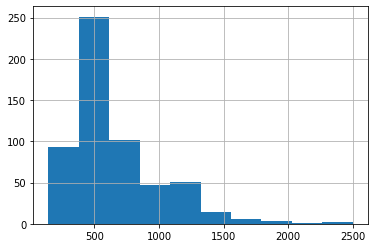

In [9]:
df["area_mean"].hist()

   
​
- Visualise some of the features to get more insight. You might want to find out things like:
   - How many patients are diagnosed as malignant or benign?
   - How about the distribution of features you are interested in?
   - Correlation between attributes?
​
- When visualising the data, think of which type of visualisation is the most suitable for your analysis, and why.
​


Inspecting class distribution of diagnosis variable

In [115]:
df['diagnosis'].value_counts()

True    569
Name: diagnosis, dtype: int64

In [132]:
#Recoding diagnosis to 1 for malignant and 0 for benign
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

Recoding target variable to boolean

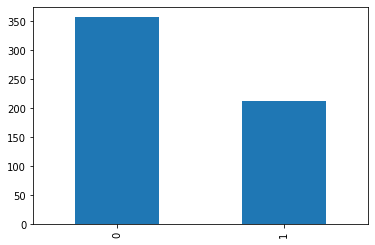

In [133]:
df['diagnosis'].value_counts().plot(kind='bar')

Correlation

Filter dataset to only mean values

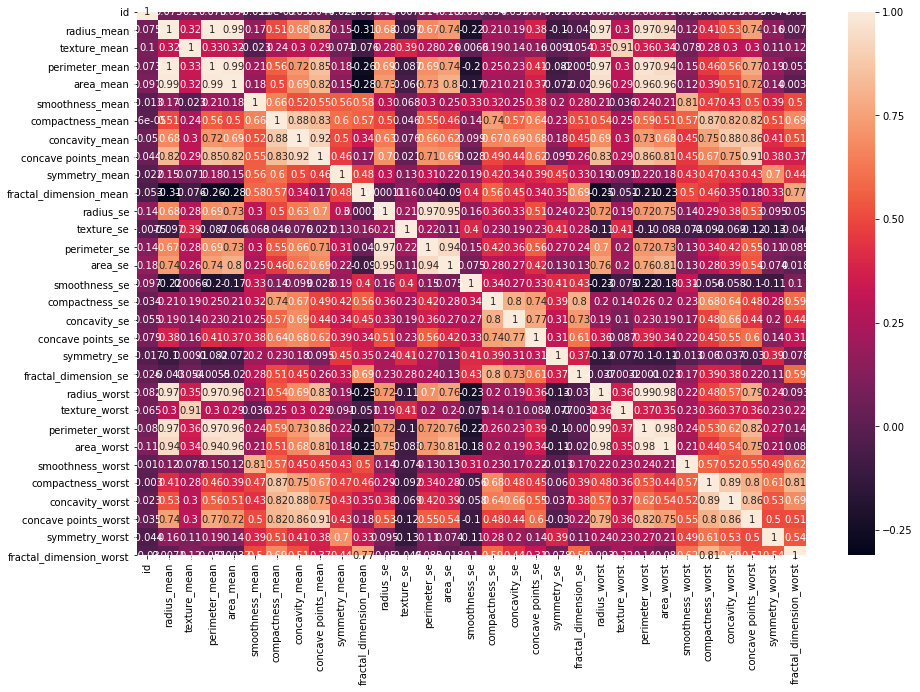

In [14]:
plt.figure(figsize = (15,10))
correlation_matrix = df.corr()
sns.heatmap(data = correlation_matrix, annot = True)

SOme variables are highly correlated and so we will calculate VIF (Variance Inflation Factor) to systematically remove highly correlated variables and reduce multicollinearity

In [33]:
df1 = df.drop(['diagnosis'], axis =1)

In [41]:
  def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return list(X)
    
calculate_vif(df1)

Dropping radius_mean with vif=63306.17203588469
Dropping radius_worst with vif=7573.943486033555
Dropping perimeter_mean with vif=3901.901687119607
Dropping perimeter_worst with vif=668.3854404127386
Dropping fractal_dimension_mean with vif=508.08682464149285
Dropping smoothness_worst with vif=368.0533791867144
Dropping texture_worst with vif=309.54444960438434
Dropping fractal_dimension_worst with vif=184.67972071700538
Dropping symmetry_worst with vif=167.30971478504884
Dropping concavity_mean with vif=142.29904340088856
Dropping radius_se with vif=104.99215955661566
Dropping concave points_worst with vif=100.94649021325061
Dropping smoothness_mean with vif=86.99658368431041
Dropping compactness_mean with vif=74.72314541276282
Dropping area_mean with vif=67.47169344522399
Dropping compactness_worst with vif=49.02308700997905
Dropping perimeter_se with vif=43.72833047786977
Dropping symmetry_mean with vif=36.0757931560618
Dropping texture_mean with vif=23.709901129257826
Dropping conc

['texture_se', 'area_se', 'concavity_se', 'concavity_worst']

The calculate_vif() function returns the names of predictors with VIF < 5

In [134]:
final_df = df[['texture_se', 'area_se', 'concavity_se', 'concavity_worst', 'diagnosis']]

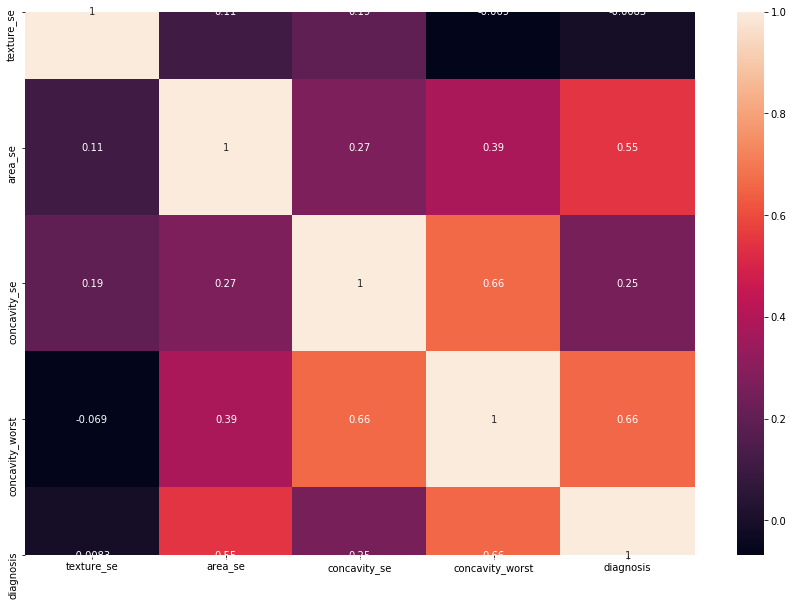

In [156]:
plt.figure(figsize = (15,10))
correlation_matrix = final_df.corr()
sns.heatmap(data = correlation_matrix, annot = True)

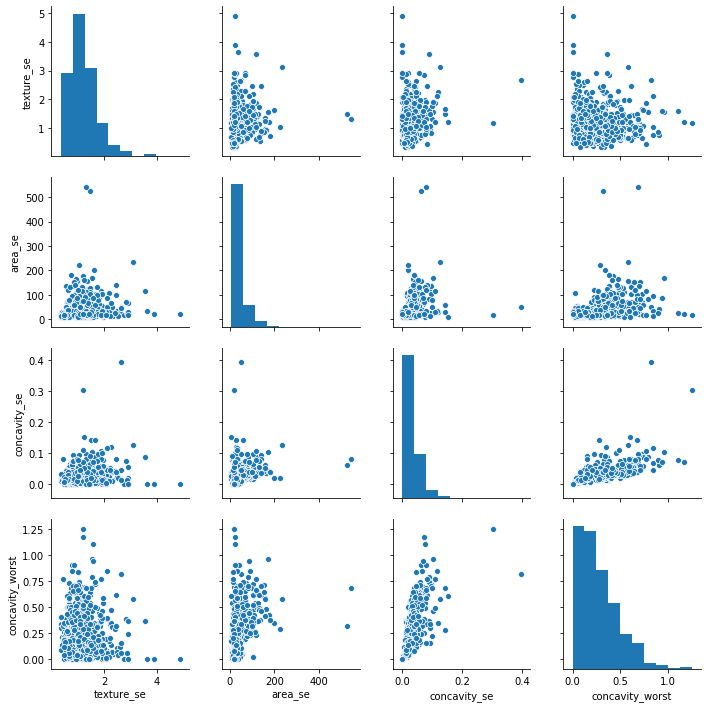

In [49]:
sns.pairplot(final_df)

 If one of the individual scatterplots in the matrix shows a linear relationship between variables, this is an indication that those variables are exhibiting multicollinearity.

### Feature and model selection
- Is it a classification or regression problem? 

Classification, predict malignant vs benign tumour

- What is the target attribute?

1) ID number
2) Diagnosis (M = malignant, B = benign)



- Do you want to perform any feature engineering?

The raw data was generated from 10 original variables.

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed.

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.


- Which features you want to use and why?

- Can any of the variables be transformed to make more useful features?
- What kind of machine learning algorithm is appropriate, and why?

Logistic regression, Decision tree, Random forest, SVM

- You should not just explore one algorithm, but look at several algorithms and compare them (you are learning data science now!)
- Any tradeoff among the algorithms you choose? Pros and cons?
​
### Data preprocessing
- How do you clean the data?
- Do you need to do any imputation?
- Do you need to remove outliers?
- How do you create a new feature?
- How do you split the data into training validation and testing data, and what ratio?
​
### Model training and evaluation
- Which parameters do you need to use?
- Which metrics do you want to optimise for?
- How do you validate your model?
- What worked and what did not work? It's also a good idea to mention what did not work and how you improved it.
- How do you test the performance of your model?
- How can you boost the performance of your model (e.g. fine tune the hyperparameters of your model or use an ensemble method)?
- What is the limitation of your analysis?
​
### Presentation and communication
- What are the most important things you want to present to your client?
- How do you structure the flow of your presentation?
- How do you translate your analysis into business insight?
- What could be done in  further analysis/research?

In [120]:
# Scale numeric variables
numeric_cols = final_df.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
final_df.loc[:, numeric_cols] = scaler.fit_transform(final_df.loc[:, numeric_cols])

C:\Users\marta\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [135]:
# Splitting the data into training and testing sets - a frequent test set size is 20%-30% of the original dataset

target = final_df['diagnosis']
one_hot_df_indep = final_df.drop('diagnosis', axis=1)

X = one_hot_df_indep.values

X_train, X_test, y_train, y_test  = train_test_split(X, target, test_size = 0.2)

In [136]:
print(" X_train: {}\n X_test: {}\n y_train: {}\n y_test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

 X_train: (455, 4)
 X_test: (114, 4)
 y_train: (455,)
 y_test: (114,)


In [137]:
# And a logistic regression, so we can investigate ROC and AUC
clf_logit = LogisticRegression()
clf_logit.fit(X_train, y_train)
pred_clf_logit = clf_logit.predict(X_test)
proba_clf_logit = clf_logit.predict_proba(X_test)

C:\Users\marta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [138]:
print(proba_clf_logit)

[[6.87075722e-01 3.12924278e-01]
 [1.96285986e-02 9.80371401e-01]
 [7.42072336e-01 2.57927664e-01]
 [1.69712424e-01 8.30287576e-01]
 [9.56260376e-01 4.37396235e-02]
 [8.83451688e-01 1.16548312e-01]
 [9.15363685e-01 8.46363145e-02]
 [8.37614921e-01 1.62385079e-01]
 [4.68442747e-01 5.31557253e-01]
 [9.31104796e-01 6.88952045e-02]
 [8.66055796e-04 9.99133944e-01]
 [8.43785113e-01 1.56214887e-01]
 [9.33758543e-01 6.62414566e-02]
 [9.44534840e-01 5.54651603e-02]
 [9.53664813e-01 4.63351872e-02]
 [9.63482536e-01 3.65174637e-02]
 [7.85355871e-07 9.99999215e-01]
 [5.60617835e-01 4.39382165e-01]
 [9.56689985e-01 4.33100153e-02]
 [4.63188612e-01 5.36811388e-01]
 [9.66647997e-01 3.33520029e-02]
 [9.87799631e-01 1.22003691e-02]
 [9.79000728e-01 2.09992722e-02]
 [4.09208626e-01 5.90791374e-01]
 [6.94599999e-02 9.30540000e-01]
 [9.04994961e-01 9.50050393e-02]
 [9.38952293e-01 6.10477070e-02]
 [9.75526565e-01 2.44734346e-02]
 [8.23613710e-01 1.76386290e-01]
 [9.26979531e-01 7.30204686e-02]
 [2.114742

In [139]:
thres = 0.5
target_predict_logit = np.where(proba_clf_logit[:,1] > thres, 1, 0)# How many actual "positive" (malignant) cases do we have in our train/test dataset? 
target_actual = y_test

#final_df['diagnosis'].value_counts() 
# What % of each dataset does it make up?

train_pos_count = y_train.sum()
test_pos_count = y_test.sum()



In [140]:
# How many "positive" (e.g., >50k) cases do we predict with the logistic regression?

logit_pos_count = target_predict_logit.sum()
print('% positive in logistic predictions (count/total): {:.2f}% ({}/{})'
      .format(logit_pos_count * 100.0 / len(y_test), logit_pos_count, len(y_test)))

% positive in logistic predictions (count/total): 28.07% (32/114)


In [141]:
# Function to display the confusion matrix nicely

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          axis=1,
                          figsize=(5,4), 
                          fontsize=14,
                          cmap='Blues'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Note that normalization here by default occurs across axis=1, or across each row (true class). 
    (QQ: which metric does this correspond to, precision or recall?)
    """
    
    if normalize:
        if axis == 1:
            cm = cm.astype('float') / cm.sum(axis=axis)[:, np.newaxis] * 100
        elif axis == 0:
            cm = cm.astype('float') / cm.sum(axis=axis)[np.newaxis, :] * 100
        else:
            raise ValueError("axis must be 0 or 1")
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig = plt.figure(figsize=figsize)
    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    q_labels = ['TN', 'FP', 'FN', 'TP']
    quad_font_size = 14
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    q_i = 0
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        
        q = plt.text(j, i-0.2, q_labels[q_i], horizontalalignment='center', fontsize=quad_font_size)
        q_i += 1
        q.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        
        t = plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                     verticalalignment="center",
                 color="#002781",
                    fontsize=fontsize)
        t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        

    plt.tight_layout(h_pad=10, w_pad=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return None

Confusion matrix, without normalization
[[73  3]
 [ 9 29]]
Normalized confusion matrix
[[96.05263158  3.94736842]
 [23.68421053 76.31578947]]


<Figure size 432x288 with 0 Axes>

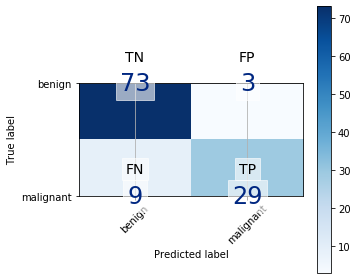

<Figure size 432x288 with 0 Axes>

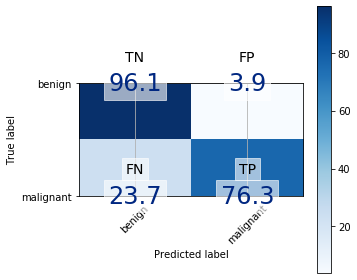

<Figure size 432x288 with 0 Axes>

In [142]:
class_names = ['benign', 'malignant']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the logistic regression
logit_cfn = confusion_matrix(target_actual, target_predict_logit)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(target_actual, target_predict_logit).ravel()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

In [143]:
log_acc = round((log_tp + log_tn) / X_test.shape[0], 3) * 100
print('Logistic regression accuracy: {:.2f}%'.format(log_acc))

log_precision = round((log_tp / (log_tp + log_fp)), 2) * 100
print('Logistic regression precision: {:.2f}%'.format(log_precision))

Logistic regression accuracy: 89.50%
Logistic regression precision: 76.00%


In [152]:
## Tune Logistic Regression
random_state = 33
cv=5
clf_rf = RandomForestClassifier(random_state=random_state)
clf_log = LogisticRegression(random_state=random_state)

params = {
    'max_features': [2,4],
    'n_estimators': [5,10],
    'max_depth': [5,10]
}

## Tune Logistic Regression
clf_log = LogisticRegression(random_state=random_state)

log_params={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
log_grid = GridSearchCV(clf_log, log_params, cv=cv);
log_grid.fit(X_train, y_train);





In [153]:
log_pred = log_grid.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(target_actual, log_pred)

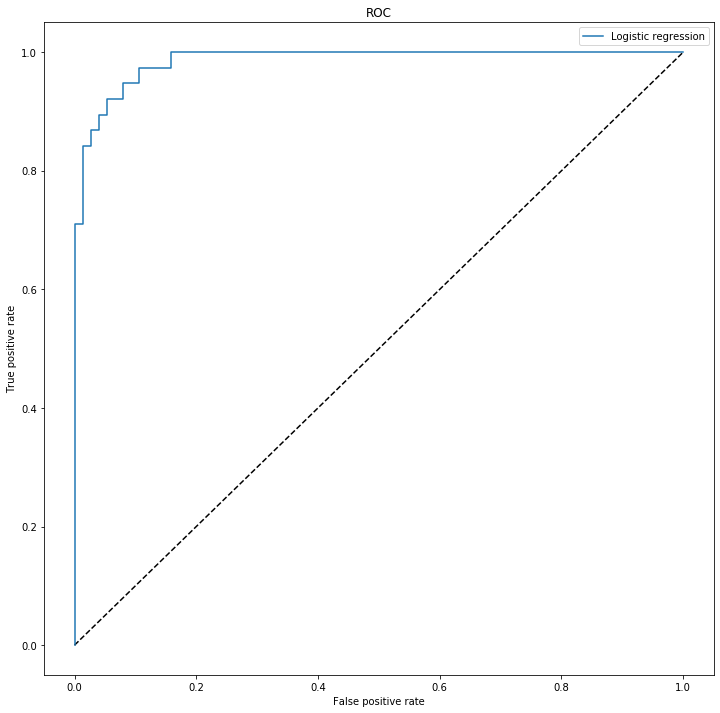

In [155]:
# Plot the ROC curve
fig = plt.figure(figsize=(12,12))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_log, tpr_log, label='Logistic regression')
#plt.plot(fpr_tree, tpr_tree, label='Decision Tree')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='best')
plt.show()